In [1]:
#### Checking against Jerry's stuff
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import esmpy as E


In [2]:
target_file = '/glade/campaign/cesm/development/espwg/SMYLE-ERA5-L83/inputdata/cesm2_init/b.e21.SMYLE_ERA5_L83_IC.f09_g17.1997-11.01/1997-11-01/b.e21.SMYLE_ERA5_L83_IC.f09_g17.1997-11.01.cam.i.1997-11-01-00000.nc'
#target_file = '/glade/derecho/scratch/juliob/era5-debugging/out-of-the-box//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'

#new_file = '/glade/derecho/scratch/juliob/era5-debugging/out-of-the-box//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'
#new_file = '/glade/derecho/scratch/juliob/era5-debugging/ps_cam_change//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'
#new_file = '/glade/derecho/scratch/juliob/era5-debugging/linear_T_vinterp//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'
new_file = '/glade/derecho/scratch/juliob/era5-debugging/back-to-square-1//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'
#new_file = '/glade/derecho/scratch/juliob/era5-debugging/serial-vinterp//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'
X0 = xr.open_dataset(target_file ,  decode_times=False )

X1 = xr.open_dataset(new_file)


In [3]:

te0=X0.T.values
te1=X1.T.values

ps0=X0.PS.values
ps1=X1.PS.values



In [4]:
X0

<xarray.Dataset> Size: 74MB
Dimensions:  (time: 1, scalar: 1, lev: 83, ilev: 84, lat: 192, lon: 288,
              slat: 191, slon: 288)
Coordinates:
  * time     (time) float64 8B 1.746e+04
  * lev      (lev) float64 664B 0.008129 0.01833 0.0348 ... 957.5 976.3 992.6
  * ilev     (ilev) float64 672B 0.004256 0.012 0.02466 ... 967.5 985.1 1e+03
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * slat     (slat) float64 2kB -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon     (slon) float64 2kB -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Dimensions without coordinates: scalar
Data variables: (12/24)
    ndbase   (scalar) int32 4B ...
    nsbase   (scalar) int32 4B ...
    nbdate   (scalar) int32 4B ...
    nbsec    (scalar) int32 4B ...
    ndcur    (time) float64 8B ...
    nscur    (time) float64 8B ...
    ...       ...
    US       (time, lev, slat, lon) float32 18MB ...
    VS       (time, lev, lat, slon) float32 18MB ...
    T        (time, lev, lat, lon) float32 18MB 182.2 182.2 ... 256.5 256.5
    Q        (time, lev, lat, lon) float32 18MB ...
    PS       (time, lat, lon) float32 221kB 6.605e+04 6.605e+04 ... 9.995e+04
    PHIS     (time, lat, lon) float32 221kB ...
Attributes: (12/22)
    Conventions:            NCAR-CSM
    Description:            Re-gridded CAM Initial Conditions from the follow...
    source1:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    source2:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    source3:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    source4:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    ...                     ...
    ps_adjust:              True; Adjust Ps per ECMWF algorithm
    q_adjust:               True; Eliminate super-saturation
    interp_log_ps:          True; Interpolate ln(Ps) rather than Ps
    OriginalFile:           ERA5_0.9x1.25_L83.cam2.i.1997-11-01-00000.nc
    history:                Thu Jan 27 21:06:25 2022: ncatted -a OriginalFile...
    NCO:                    netCDF Operators version 4.9.5 (Homepage = http:/...

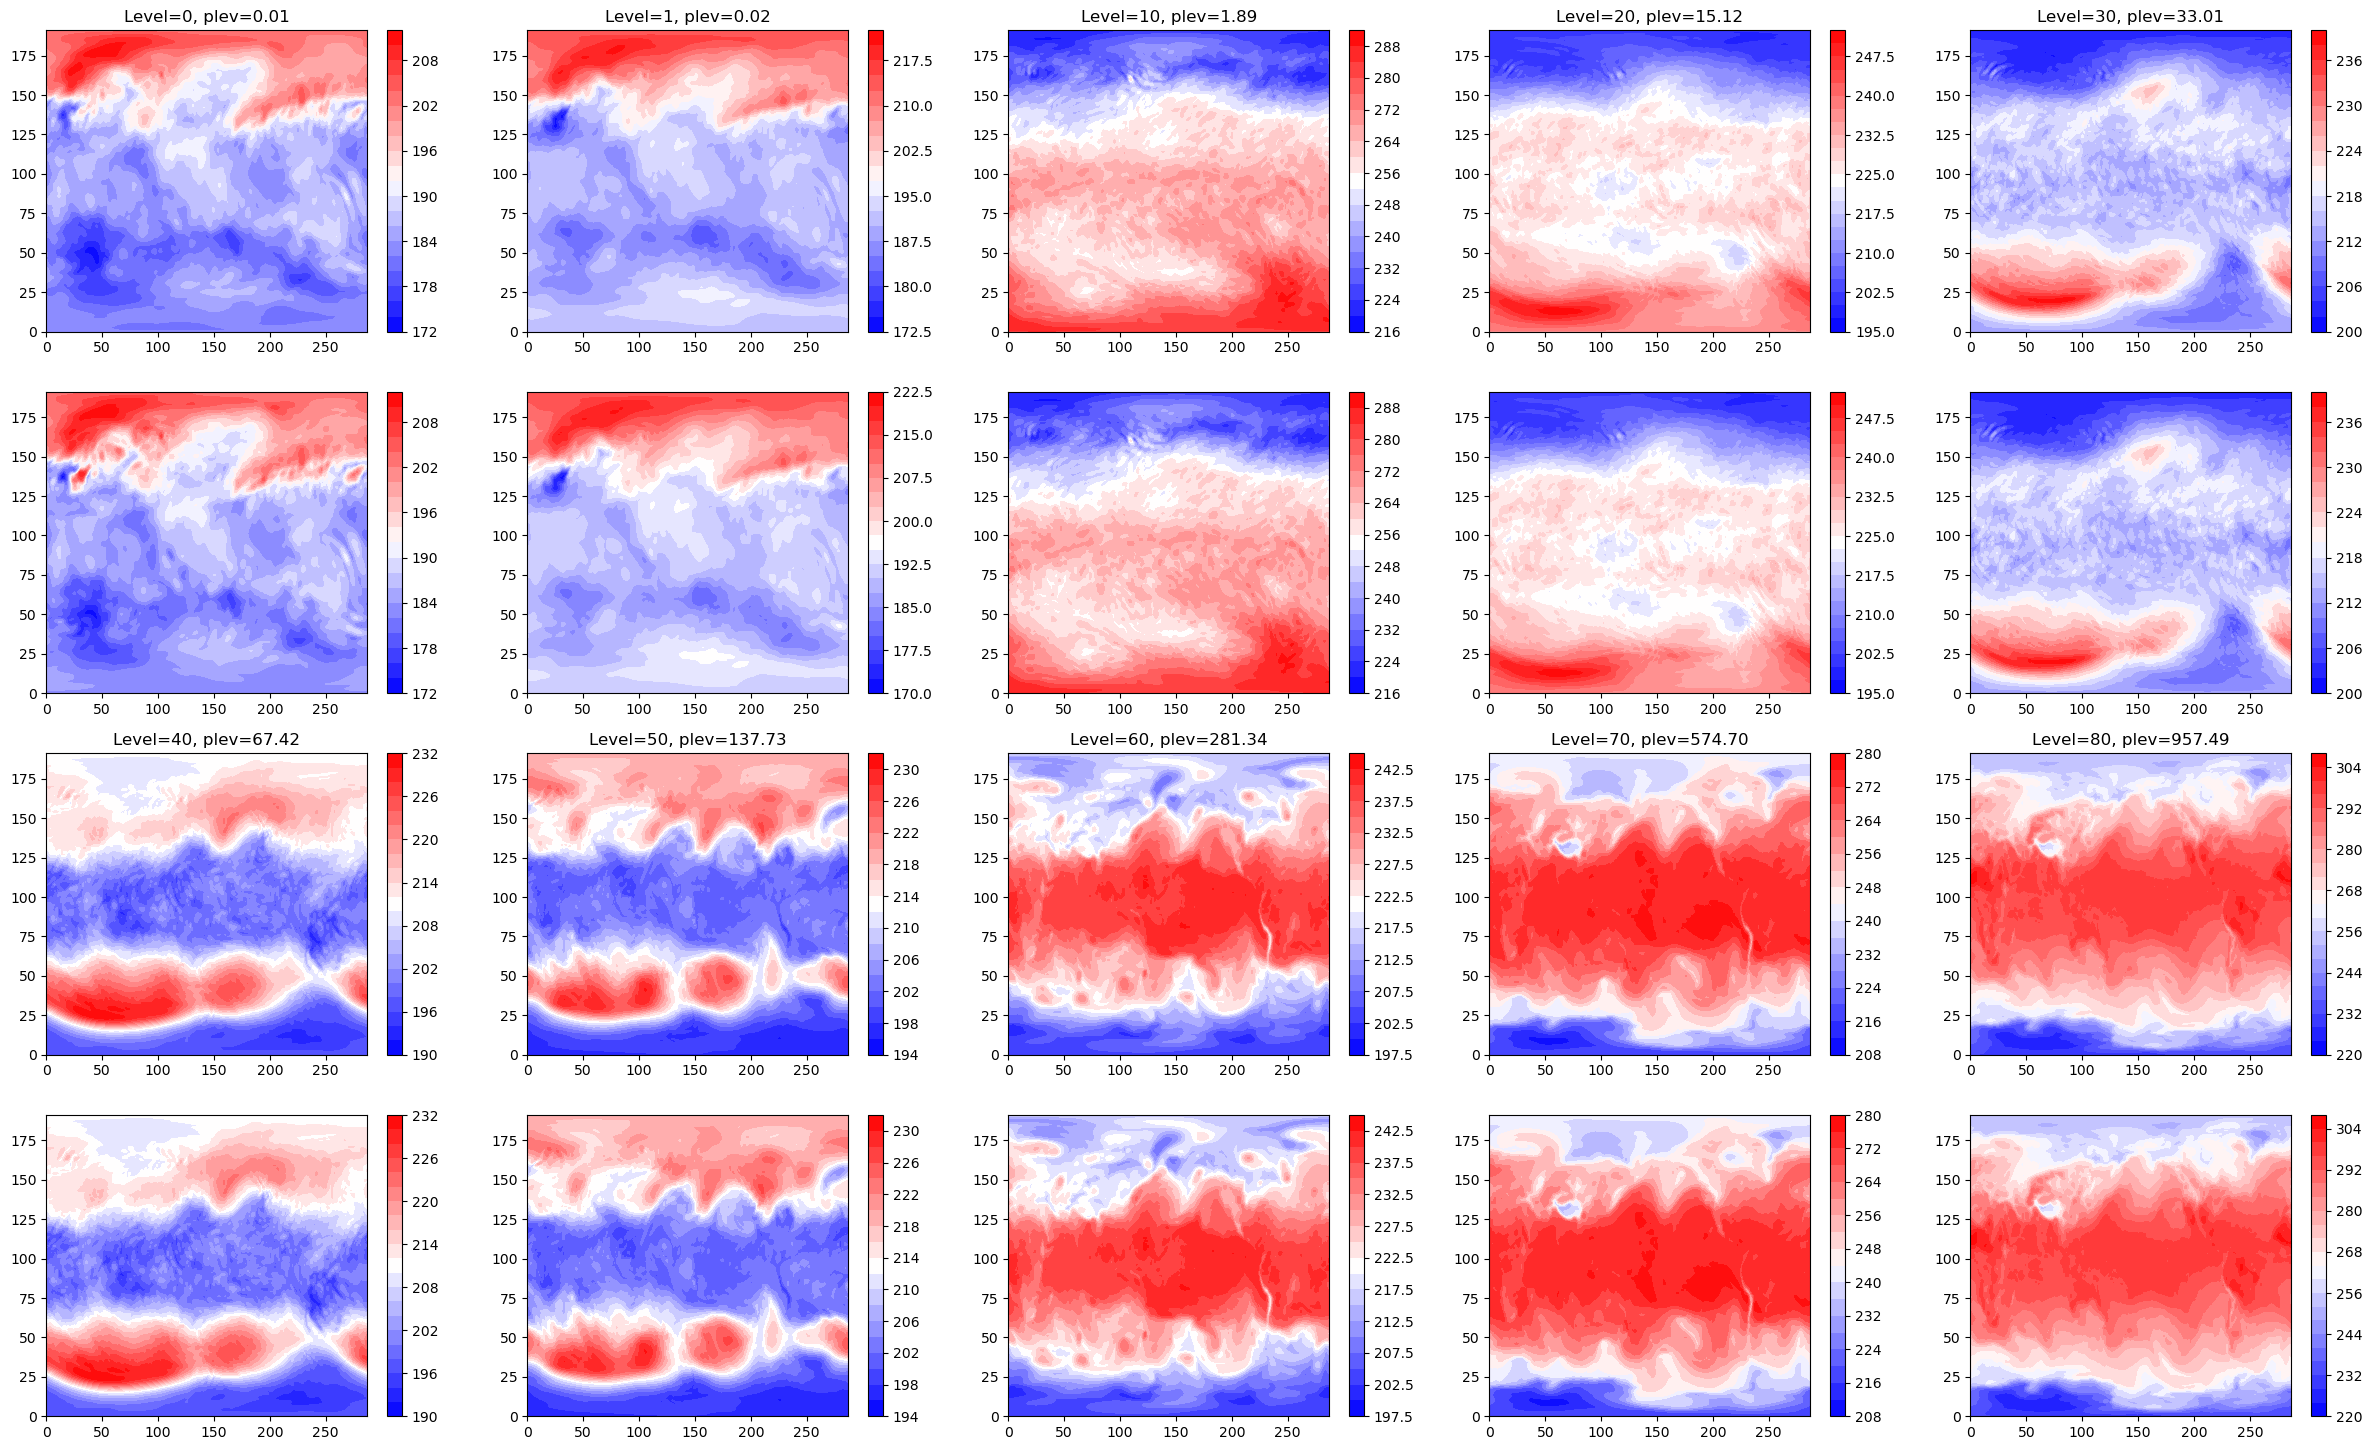

In [5]:
z=0
levs=21 #np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(4, 5, figsize=(30, 18))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,20,30,40,50,60,70,80]
i=0
for z in zees:
    co = ax[i].contourf( te0[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    cu = ax[i+5].contourf( te1[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, plev={X0.lev[z].values:0.2f}' )
    cb = plt.colorbar( co )
    cb2 = plt.colorbar( cu )
    if i==4:
        i=i+5+1
    else:
        i=i+1

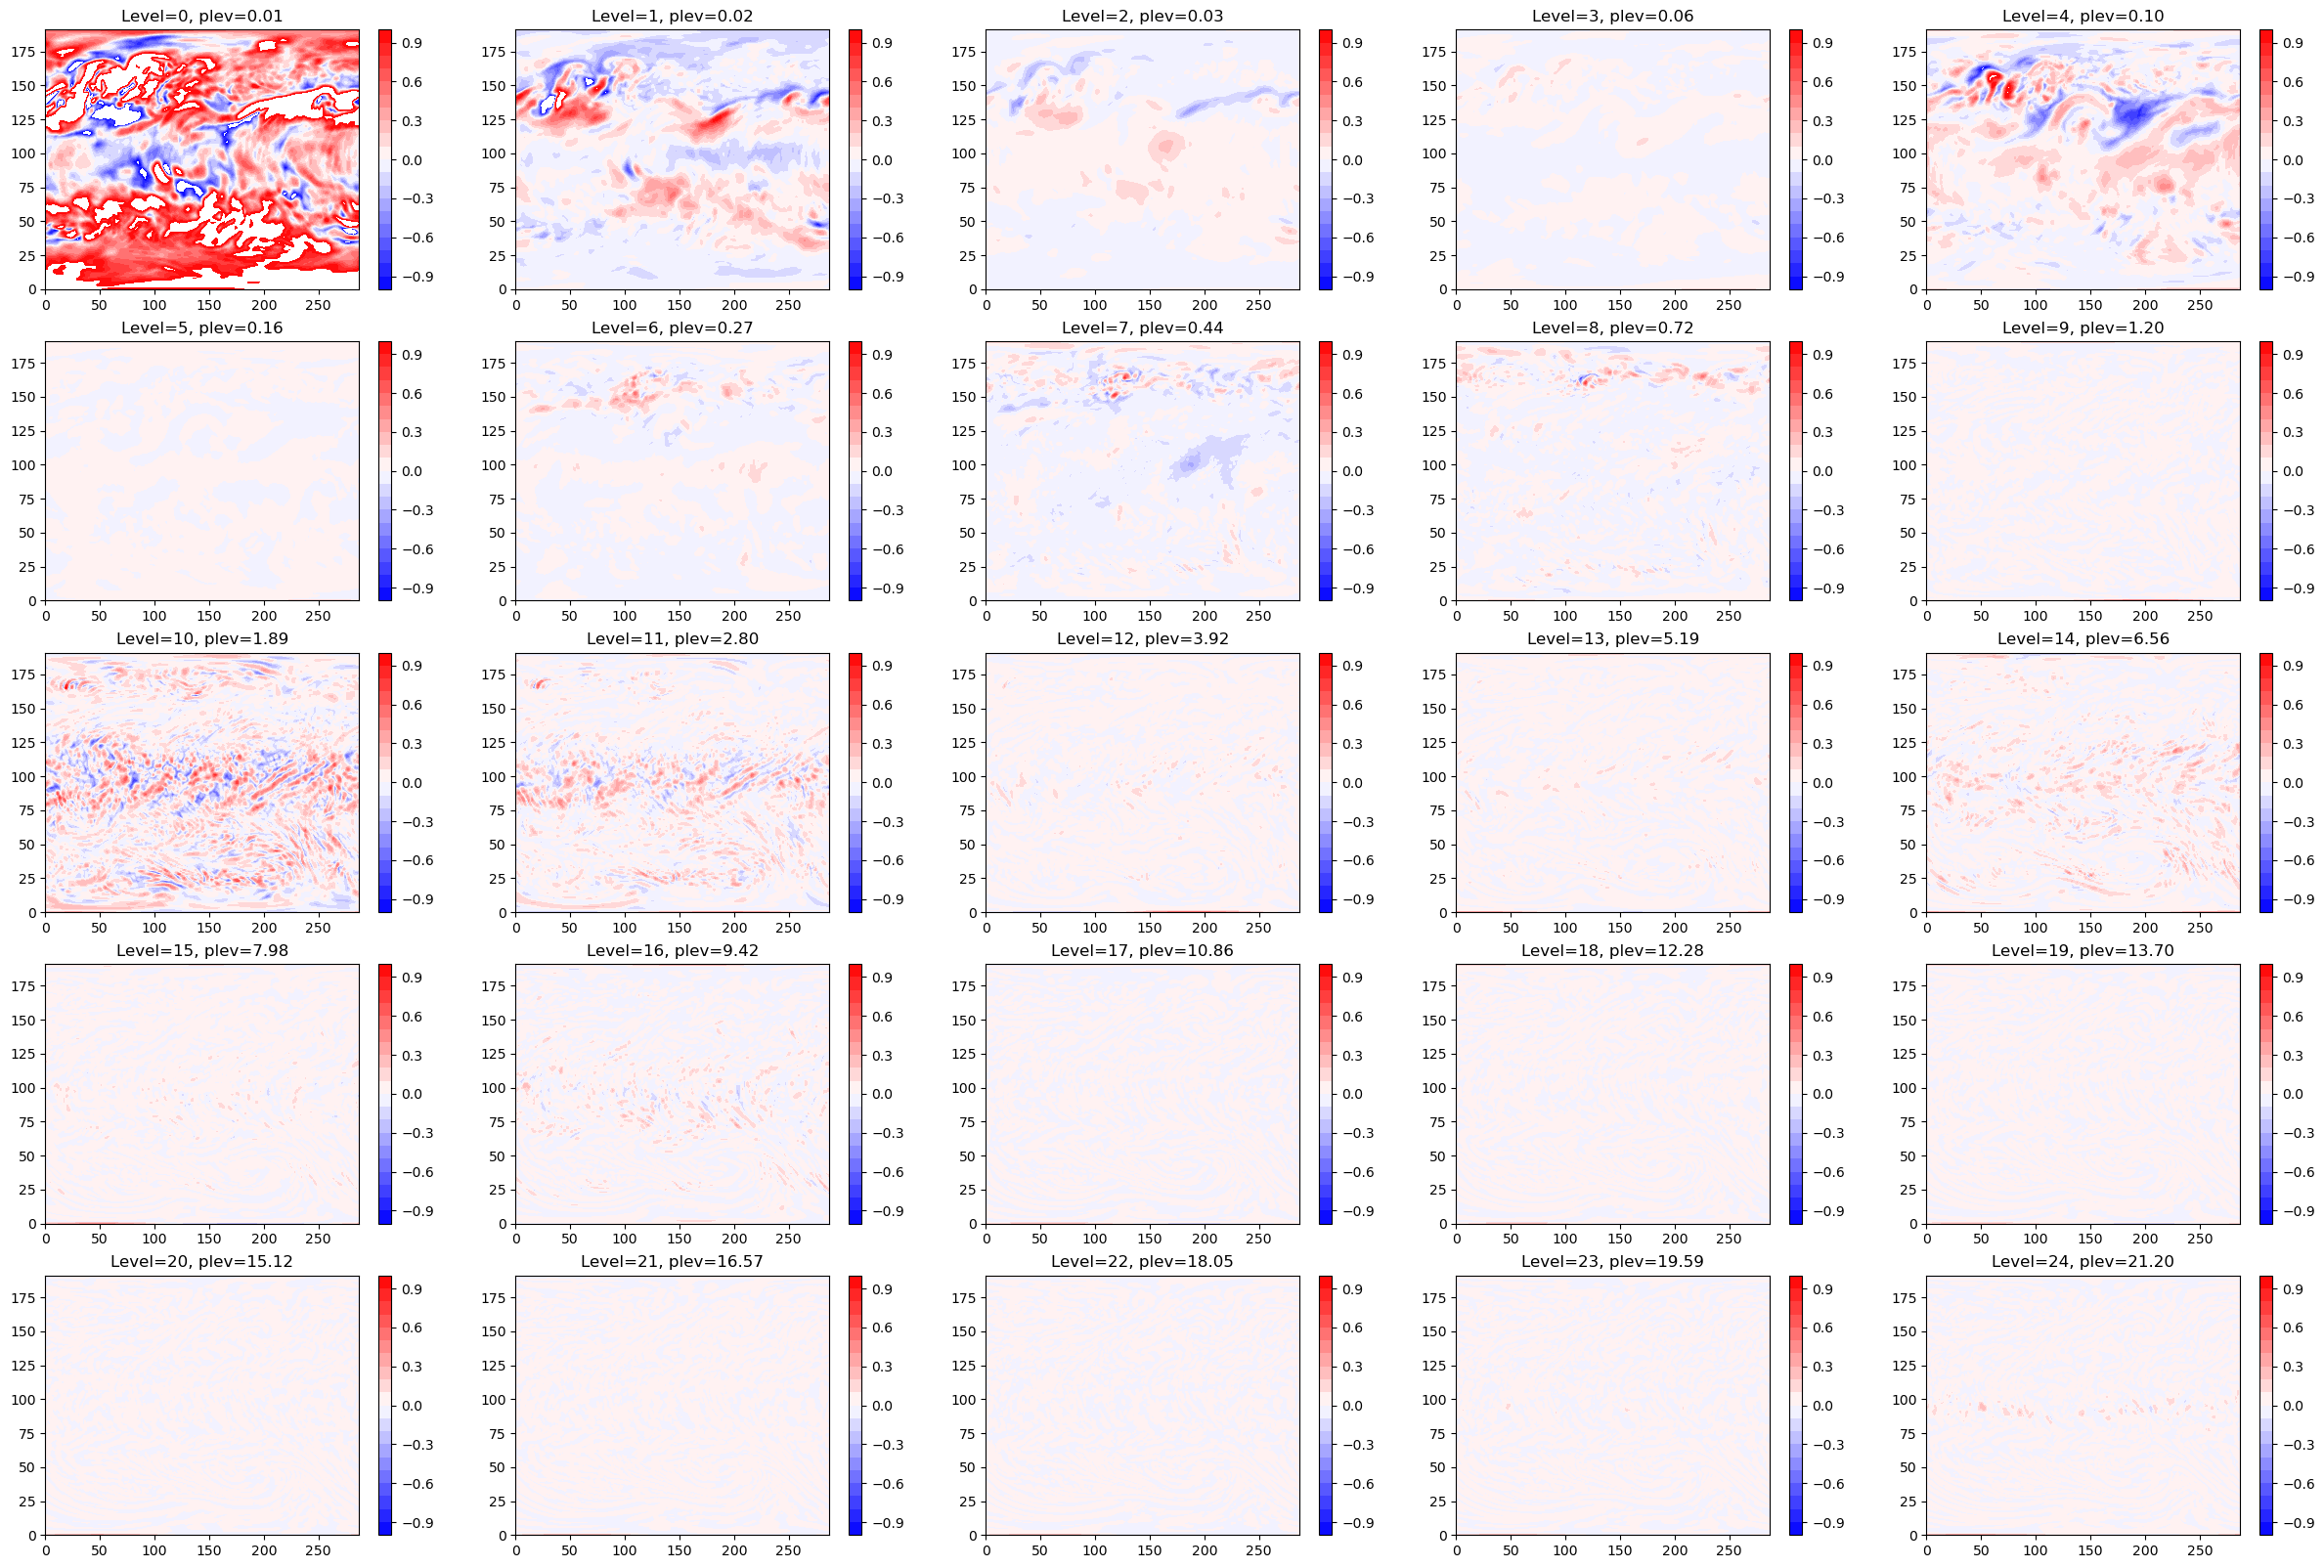

In [6]:
z=0
levs=1.0*np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(5, 5, figsize=(30, 20))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,17,30,40,50,60,70,80]
zees=np.arange(25)
i=0
for z in zees:
    co = ax[i].contourf( te1[0,z,:,:] - te0[0,z,:,:] , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, plev={X0.lev[z].values:0.2f}' )
    cb = plt.colorbar( co )
    i=i+1

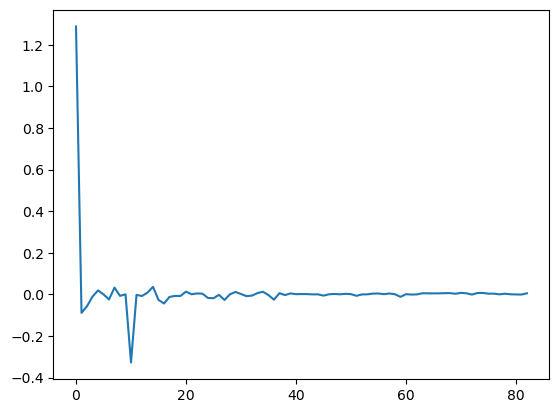

In [7]:

#plt.plot( te0[0,:,10,200])
plt.plot( te1[0,:,10,200]-te0[0,:,10,200])


In [8]:
nt,nz,ny,nx=np.shape( te0 )

diff=np.zeros( nz )

for z in np.arange( nz ):
    diff[z] = np.average(  np.average(  (te1[0,z,:,:] - te0[0,z,:,:] )**2 , axis=1) , axis=0 ) 

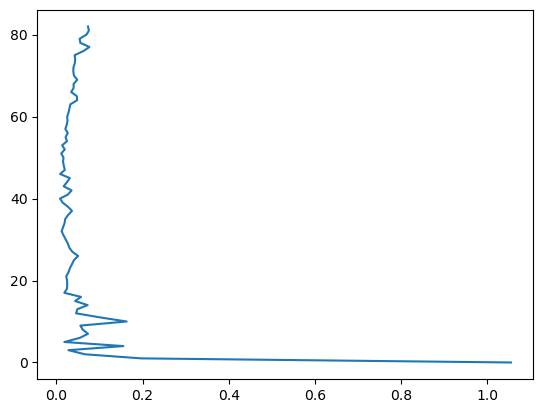

In [9]:
plt.plot( np.sqrt(diff)  , np.arange( nz) ) #X0.lev )

In [10]:
X1

<xarray.Dataset> Size: 259MB
Dimensions:    (lon: 288, lat: 192, slon: 288, slat: 191, lev: 83, ilev: 84,
                time: 1)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * slon       (slon) float64 2kB -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * slat       (slat) float64 2kB -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * lev        (lev) float64 664B 0.008129 0.01833 0.0348 ... 957.5 976.3 992.6
  * ilev       (ilev) float64 672B 0.004256 0.012 0.02466 ... 967.5 985.1 1e+03
  * time       (time) int64 8B 0
Data variables: (12/17)
    TimeStamp  datetime64[ns] 8B ...
    P_00       float64 8B ...
    hyai       (ilev) float64 672B ...
    hybi       (ilev) float64 672B ...
    hyam       (lev) float64 664B ...
    hybm       (lev) float64 664B ...
    ...         ...
    Q          (time, lev, lat, lon) float64 37MB ...
    U          (time, lev, lat, lon) float64 37MB ...
    V          (time, lev, lat, lon) float64 37MB ...
    US         (time, lev, slat, lon) float64 37MB ...
    VS         (time, lev, lat, slon) float64 37MB ...
    W          (time, lev, lat, lon) float64 37MB ...

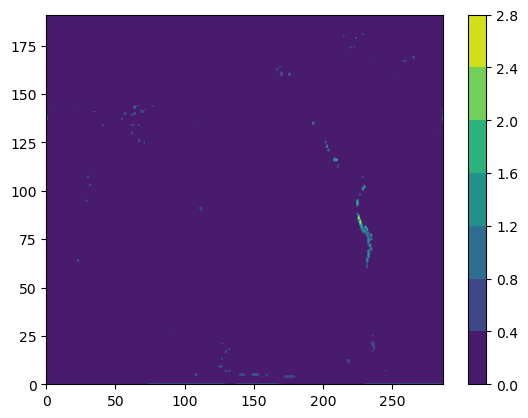

In [11]:

plt.contourf(  np.abs(X0.T.values[0,z,:,:]-X1.T.values[0,z,:,:]) )
plt.colorbar()

#### #plt.plot(X0.ilev.values)
plt.plot(X1.ilev.values-X0.ilev.values)


In [12]:
era5dir = "/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/"

year,month,day,hour0 = 1997,11,1,0

monStr=str( year ).zfill(4)+str(month).zfill(2)

hour1=hour0+5
ymdh0=str( year ).zfill(4)+str(month).zfill(2)+str(day).zfill(2)+str(hour0).zfill(2)
ymdh1=str( year ).zfill(4)+str(month).zfill(2)+str(day).zfill(2)+str(hour1).zfill(2)
ymdh=ymdh0+'_'+ymdh1


wrkdir=era5dir+monStr+"/"
#Define all file names for later use in dask function
#-----------------------------------------------------
spfile= wrkdir + 'e5.oper.an.ml.128_134_sp.regn320sc.'+ymdh+'.nc'
tfile = wrkdir + 'e5.oper.an.ml.0_5_0_0_0_t.regn320sc.'+ymdh+'.nc'
qfile = wrkdir + 'e5.oper.an.ml.0_5_0_1_0_q.regn320sc.'+ymdh+'.nc'
ufile = wrkdir + 'e5.oper.an.ml.0_5_0_2_2_u.regn320uv.'+ymdh+'.nc'
vfile = wrkdir + 'e5.oper.an.ml.0_5_0_2_3_v.regn320uv.'+ymdh+'.nc'
wfile = wrkdir + 'e5.oper.an.ml.0_5_0_2_8_w.regn320sc.'+ymdh+'.nc'

T_ERA   = xr.open_mfdataset( tfile , data_vars='different', coords='different')
PS_ERA   = xr.open_mfdataset( spfile , data_vars='different', coords='different')



In [13]:
print(sys.path)
T_ERA

['/glade/u/apps/opt/conda/envs/npl-2024b/lib/python311.zip', '/glade/u/apps/opt/conda/envs/npl-2024b/lib/python3.11', '/glade/u/apps/opt/conda/envs/npl-2024b/lib/python3.11/lib-dynload', '', '/glade/u/home/juliob/.local/lib/python3.11/site-packages', '/glade/work/juliob', '/glade/u/apps/opt/conda/envs/npl-2024b/lib/python3.11/site-packages']


<xarray.Dataset> Size: 3GB
Dimensions:     (time: 6, level: 137, latitude: 640, longitude: 1280,
                 half_level: 138)
Coordinates:
  * half_level  (half_level) int32 552B 1 2 3 4 5 6 ... 133 134 135 136 137 138
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * level       (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * time        (time) datetime64[ns] 48B 1997-11-01 ... 1997-11-01T05:00:00
Data variables:
    T           (time, level, latitude, longitude) float32 3GB dask.array<chunksize=(1, 137, 640, 1280), meta=np.ndarray>
    a_half      (half_level) float64 1kB dask.array<chunksize=(138,), meta=np.ndarray>
    a_model     (level) float64 1kB dask.array<chunksize=(137,), meta=np.ndarray>
    b_half      (half_level) float64 1kB dask.array<chunksize=(138,), meta=np.ndarray>
    b_model     (level) float64 1kB dask.array<chunksize=(137,), meta=np.ndarray>
    utc_date    (time) int32 24B dask.array<chunksize=(6,), meta=np.ndarray>
    weight      (latitude) float64 5kB dask.array<chunksize=(640,), meta=np.ndarray>
    zero        (latitude) float64 5kB dask.array<chunksize=(640,), meta=np.ndarray>
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r8i...
    CONVERSION_AND_COMPRSSION_DATE:         Tue Nov 29 11:09:52 MST 2022
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Tue Nov 29 11:10:05 2022: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [14]:
import esmpy as E


In [15]:

#from Utils import GridUtils as GrU
Src='ERA5'
Dst='fv1x1'


In [16]:
workdir_ = '/glade/work/juliob'
if ( workdir_ not in sys.path ):
    sys.path.append(workdir_)
    print( f" a path to {workdir_} added in {__name__} ")


from PyRegridding.Drivers import RegridField as RgF
from PyRegridding.Utils import GridUtils as GrU 

############################
# Initialize dict for regridding
############################
RgObs={}

RegridObj = GrU.regrid_object_lib(RgOb=RgObs, src=Src, dst=Dst, RegridMethod='CONSERVE' )


 PyRegridding.Utils.MyConstants in /glade/work/juliob/PyRegridding/Utils 
Using Flexible parallel/serial VertRegrid 
 PyRegridding.Utils.MyConstants in /glade/work/juliob/PyRegridding/Utils 
ERA5_x_fv1x1_CONSERVE will be created !!!!
Got monikers ERA5 and fv1x1 from arguments

 
 Mapping ... ERA5 -x- fv1x1 
Ready to go ... ERA5 -x- fv1x1 0.0000 seconds
Finished Grid Mesh creation  0.3398 seconds
/glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/fv0.9x1.25_141008.nc 
 (288, 192)
/glade/work/juliob/ERA5-proc/ERA5interp/grids/ERA5_640x1280_scrip.nc 
 (1280, 640)
Finished dstField,srcField  0.3424 seconds
/glade/work/juliob/GridFiles/Weights/ERA5_x_fv1x1_CONSERVE.nc
Reading weights from /glade/work/juliob/GridFiles/Weights/ERA5_x_fv1x1_CONSERVE.nc 
Finished generatind Regrd from wgts file 3.7416 seconds
 Not interpolating. Returning: regrd, srcf, dstf, ERA5, fv1x1 


In [17]:
te_era = T_ERA.T.values
ps_era = PS_ERA.SP.values


In [18]:
te_era_x1 =RgF.Horz(xfld_Src=te_era , Src=Src, Dst=Dst , RegridObj_In= RegridObj )

Got monikers ERA5 and fv1x1 from arguments

 
 Mapping ... ERA5 -x- fv1x1 
 Getting (regrd, srcf, dstf) from argument 
Used GrU.latlon /glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/fv0.9x1.25_141008.nc for lat lon 
 dstHkey=yx , ncol=0 , ny=192, nx=288 
 srcShape=tzyx, nzot=6, nz=137 


In [19]:
te_era_x1.shape

(6, 137, 192, 288)

In [20]:
T_ERA

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 6, level: 137, latitude: 640, longitude: 1280,
                 half_level: 138)
Coordinates:
  * half_level  (half_level) int32 552B 1 2 3 4 5 6 ... 133 134 135 136 137 138
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * level       (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * time        (time) datetime64[ns] 48B 1997-11-01 ... 1997-11-01T05:00:00
Data variables:
    T           (time, level, latitude, longitude) float32 3GB dask.array<chunksize=(1, 137, 640, 1280), meta=np.ndarray>
    a_half      (half_level) float64 1kB dask.array<chunksize=(138,), meta=np.ndarray>
    a_model     (level) float64 1kB dask.array<chunksize=(137,), meta=np.ndarray>
    b_half      (half_level) float64 1kB dask.array<chunksize=(138,), meta=np.ndarray>
    b_model     (level) float64 1kB dask.array<chunksize=(137,), meta=np.ndarray>
    utc_date    (time) int32 24B dask.array<chunksize=(6,), meta=np.ndarray>
    weight      (latitude) float64 5kB dask.array<chunksize=(640,), meta=np.ndarray>
    zero        (latitude) float64 5kB dask.array<chunksize=(640,), meta=np.ndarray>
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r8i...
    CONVERSION_AND_COMPRSSION_DATE:         Tue Nov 29 11:09:52 MST 2022
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Tue Nov 29 11:10:05 2022: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

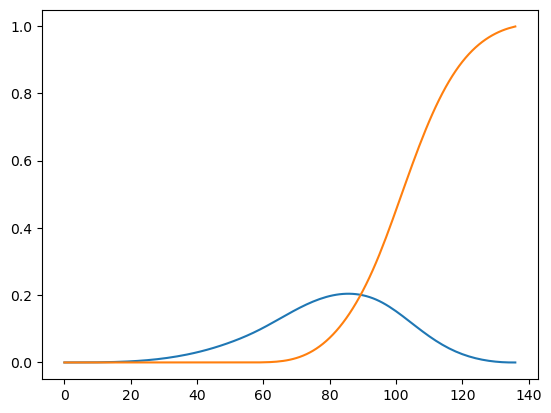

In [21]:

eta_era = T_ERA.a_model.values/100_000. + T_ERA.b_model.values
eta_cam = X1.hyam.values + X1.hybm.values

plt.plot( T_ERA.a_model.values/100_000. )
plt.plot( T_ERA.b_model.values )



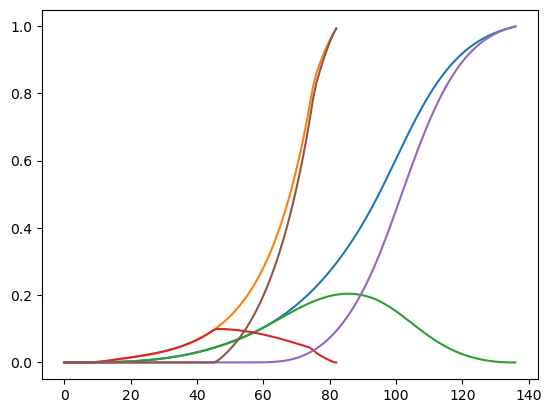

In [22]:

eta_era = T_ERA.a_model.values/100_000. + T_ERA.b_model.values
eta_cam = X1.hyam.values + X1.hybm.values

am_era, bm_era = T_ERA.a_model.values/100_000. , T_ERA.b_model.values

am_cam, bm_cam = X1.hyam.values , X1.hybm.values

plt.plot( eta_era)
plt.plot( eta_cam)
plt.plot( am_era)
plt.plot( am_cam)
plt.plot( bm_era)
plt.plot( bm_cam)



In [23]:
nte,nze,nye,nxe = np.shape(te_era)
ntc,nzc,nyc,nxc = np.shape(te1)
pmid_era = np.zeros( (1, nze, nye, nxe) )
pmid_era_Lcam = np.zeros( (1, nzc, nye, nxe) )

In [24]:
for t in np.arange(1):
    for y in np.arange(nye):
        for x in np.arange(nxe):
            pmid_era_z = am_era*100_000. + bm_era*ps_era[t,y,x]
            pmid_era[t,:,y,x] = pmid_era_z
            pmid_era_Lcam_z = am_cam*100_000. + bm_cam*ps_era[t,y,x]
            pmid_era_Lcam[t,:,y,x] = pmid_era_Lcam_z




(6, 640, 1280)


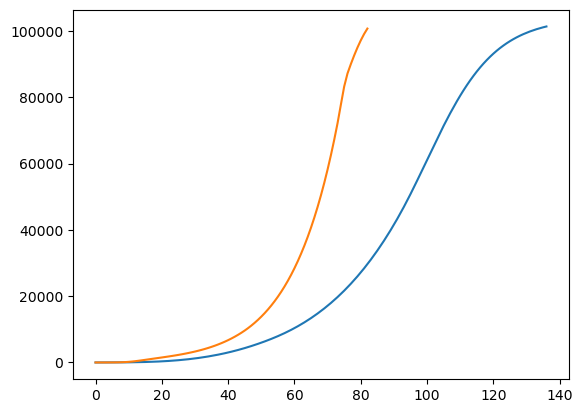

In [25]:
print( np.shape(ps_era) )
t,y,x = 0, 400, 1000

plt.plot( pmid_era[t,:,y,x] )
plt.plot( pmid_era_Lcam[t,:,y,x] )


In [26]:
print( eta_cam[10] )

0.001889750361442566


In [27]:
loo=np.argmin( np.abs( eta_era - eta_cam[10] ) )

In [28]:
print(eta_era[loo])

0.0017530898300000001


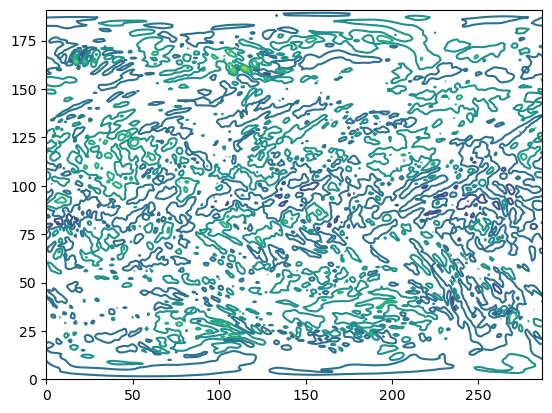

In [29]:
plt.contour( te_era_x1[0,loo,:,:] - te1[0,10,:,:] )

In [30]:
from scipy import interpolate as intr


In [31]:
nt,nz,ny,nx = np.shape(te1)

te_era_x1_Lcam_eta = np.zeros( (nt,nz,ny,nx) )

for t in np.arange(nt):
    for y in np.arange( ny ):
        for x in np.arange( nx ):
        
            fint=intr.interp1d( x = eta_era, y=te_era_x1[t,:,y,x] , 
                                fill_value='extrapolate', kind='quadratic'  )
            te_era_x1_Lcam_eta[t,:,y,x] = fint(   eta_cam  )


In [32]:
nte,nze,nye,nxe = np.shape(te_era)

te_era_Lcam_eta = np.zeros( (1,  nz  ,nye,nxe) )

for t in np.arange(1):
    for y in np.arange( nye ):
        for x in np.arange( nxe ):
        
            fint=intr.interp1d( x = eta_era, y=te_era[t,:,y,x] , 
                                fill_value='extrapolate', kind='quadratic'  )
            te_era_Lcam_eta[t,:,y,x] = fint(   eta_cam  )
    print( f"Did t={t}" )
    
te_era_Lcam_eta_x1 =RgF.Horz(xfld_Src=te_era_Lcam_eta , Src=Src, Dst=Dst , RegridObj_In= RegridObj )

Did t=0
Got monikers ERA5 and fv1x1 from arguments

 
 Mapping ... ERA5 -x- fv1x1 
 Getting (regrd, srcf, dstf) from argument 
Used GrU.latlon /glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/fv0.9x1.25_141008.nc for lat lon 
 dstHkey=yx , ncol=0 , ny=192, nx=288 
 srcShape=tzyx, nzot=1, nz=83 


In [33]:
nte,nze,nye,nxe = np.shape(te_era)

te_era_Lcam_prs = np.zeros( (1,  nz  ,nye,nxe) )

for t in np.arange(1):
    for y in np.arange( nye ):
        for x in np.arange( nxe ):
            z_era = pmid_era[t,:,y,x] 
            fint=intr.interp1d( x = z_era, y=te_era[t,:,y,x] , 
                                fill_value='extrapolate', kind='quadratic'  )
            z_cam = pmid_era_Lcam[t,:,y,x] 
            te_era_Lcam_prs[t,:,y,x] = fint(   z_cam  )
    print( f"Did t={t}" )

te_era_Lcam_prs_x1 =RgF.Horz(xfld_Src=te_era_Lcam_prs , Src=Src, Dst=Dst , RegridObj_In= RegridObj )

Did t=0
Got monikers ERA5 and fv1x1 from arguments

 
 Mapping ... ERA5 -x- fv1x1 
 Getting (regrd, srcf, dstf) from argument 
Used GrU.latlon /glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/fv0.9x1.25_141008.nc for lat lon 
 dstHkey=yx , ncol=0 , ny=192, nx=288 
 srcShape=tzyx, nzot=1, nz=83 


In [34]:
te_era_Lcam_eta_x1 =RgF.Horz(xfld_Src=te_era_Lcam_eta , Src=Src, Dst=Dst , RegridObj_In= RegridObj )


Got monikers ERA5 and fv1x1 from arguments

 
 Mapping ... ERA5 -x- fv1x1 
 Getting (regrd, srcf, dstf) from argument 
Used GrU.latlon /glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/fv0.9x1.25_141008.nc for lat lon 
 dstHkey=yx , ncol=0 , ny=192, nx=288 
 srcShape=tzyx, nzot=1, nz=83 


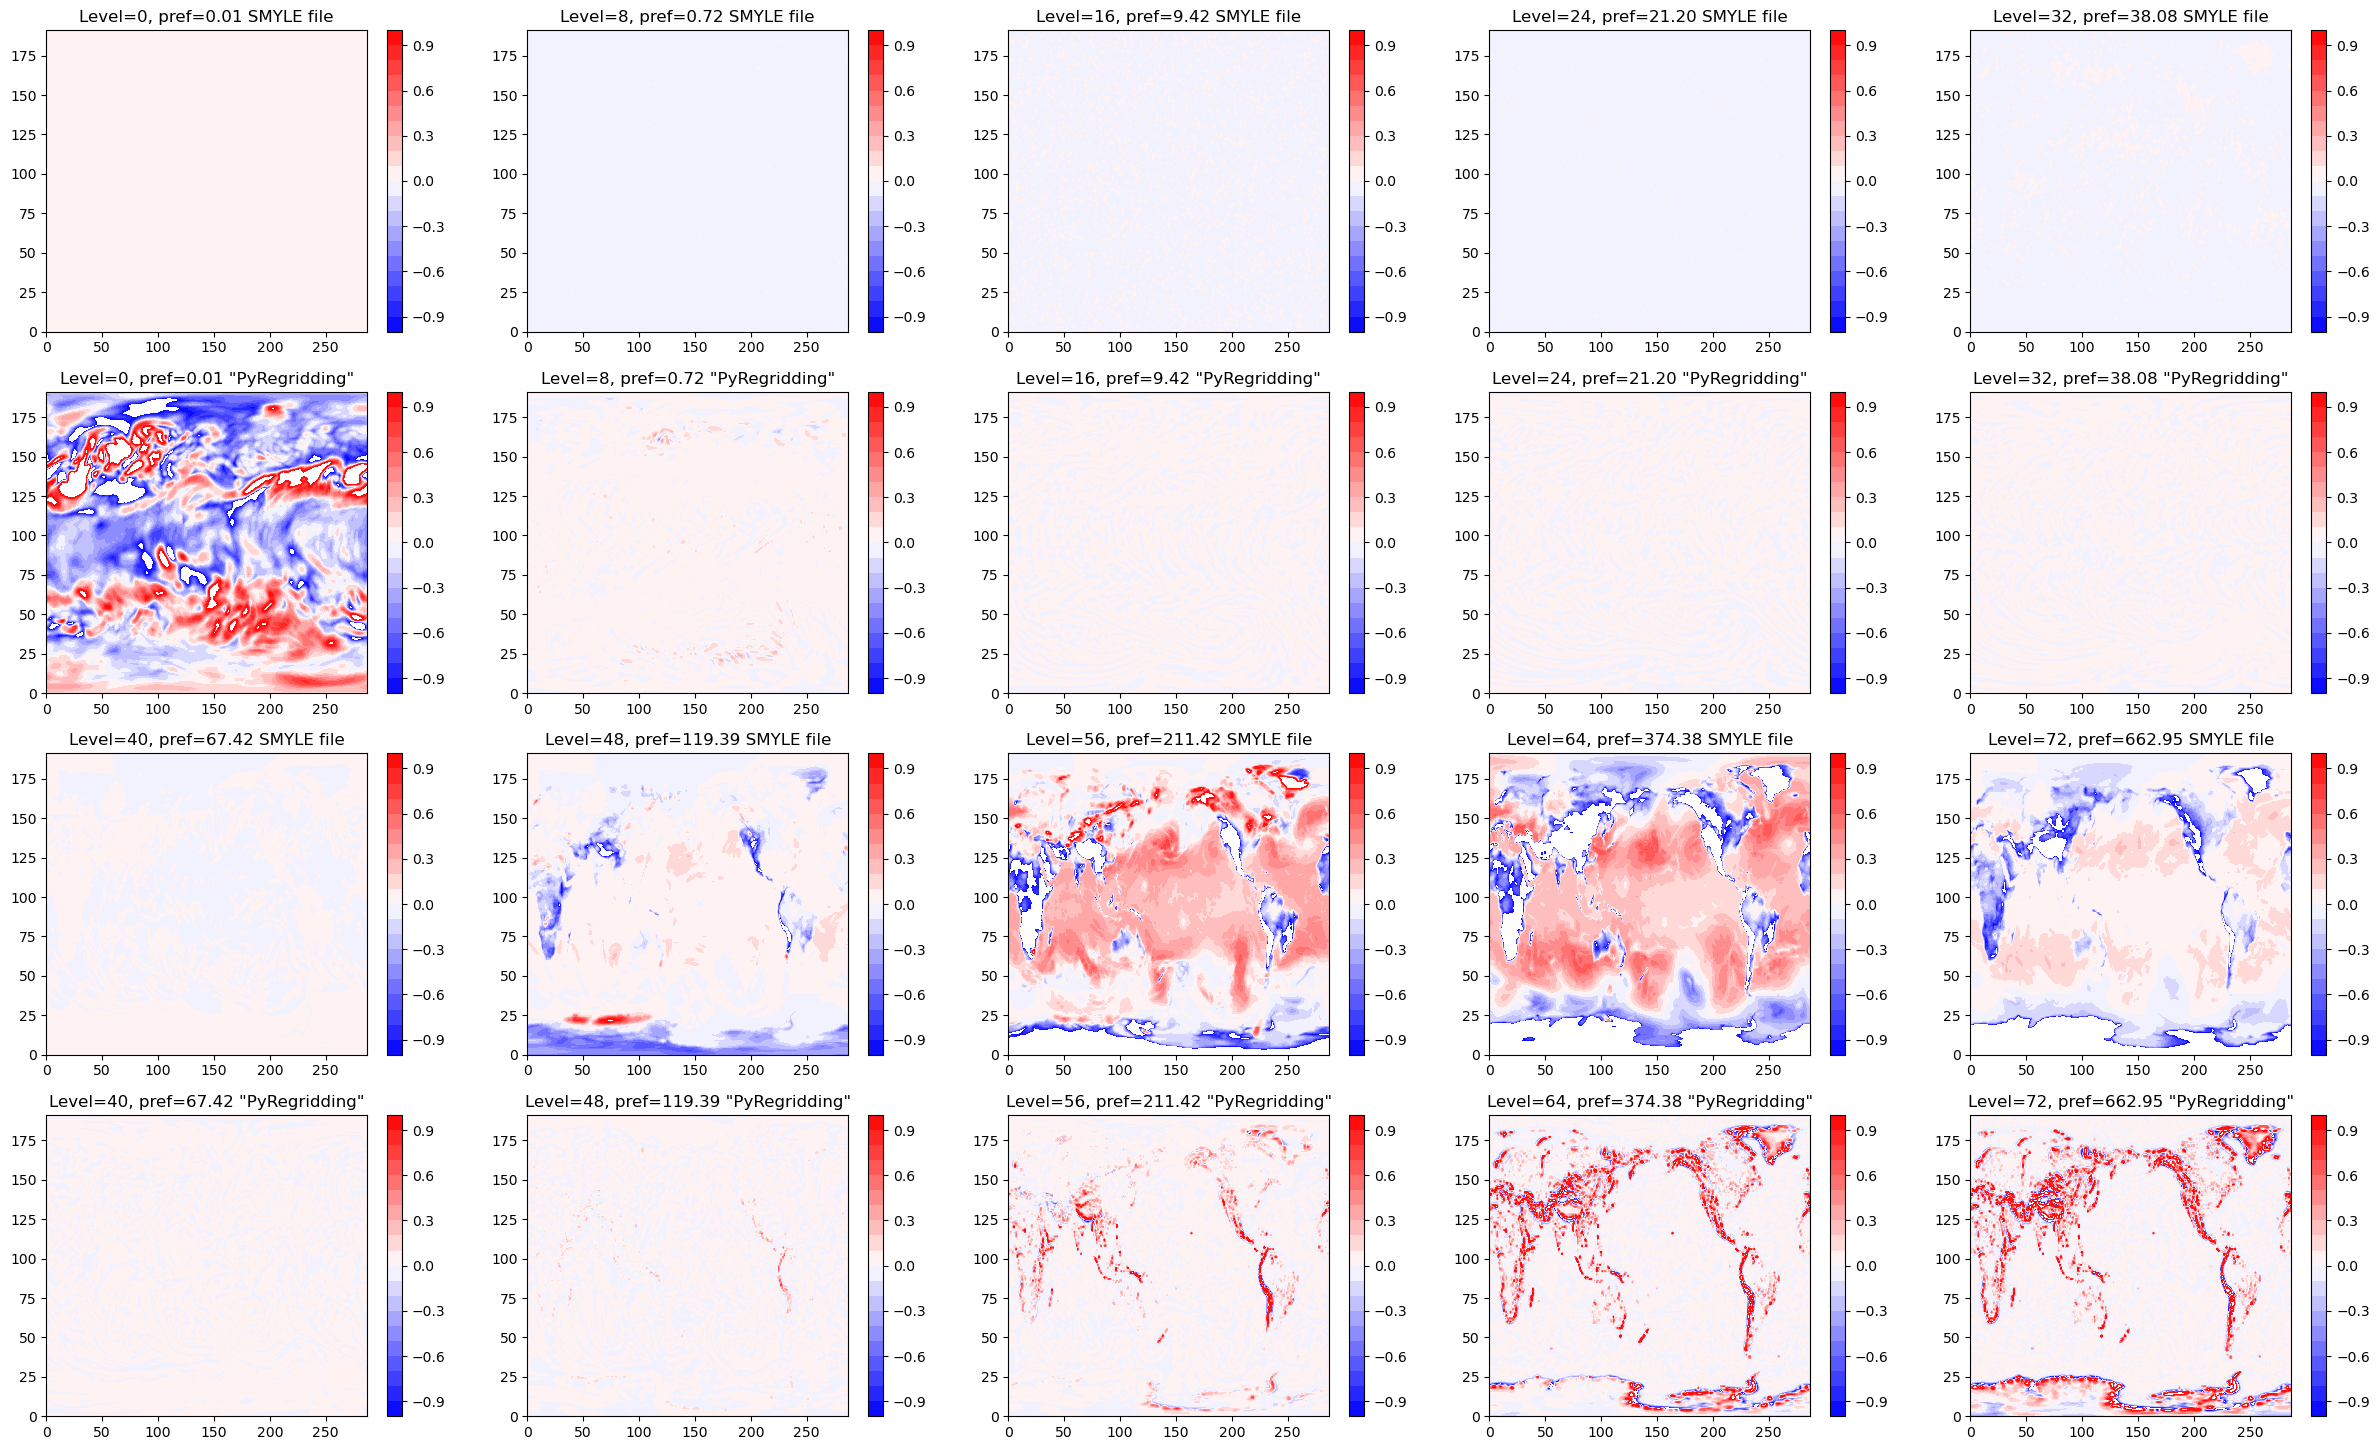

In [35]:

levs=np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(4, 5, figsize=(30, 18))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,20,30,40,50,60,70,80]
zees=np.arange(0,40,step=4)
zees=np.arange(0,80,step=8)

i=0
for z in zees:
    co = ax[i].contourf( te_era_Lcam_prs_x1[0,z,:,:] -te_era_Lcam_eta_x1[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    cu = ax[i+5].contourf( te1[0,z,:,:] -te_era_Lcam_prs_x1[0,z,:,:] , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} SMYLE file' )
    ax[i+5].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} "PyRegridding"' )
    cb = plt.colorbar( co )
    cb2 = plt.colorbar( cu )
    if i==4:
        i=i+5+1
    else:
        i=i+1

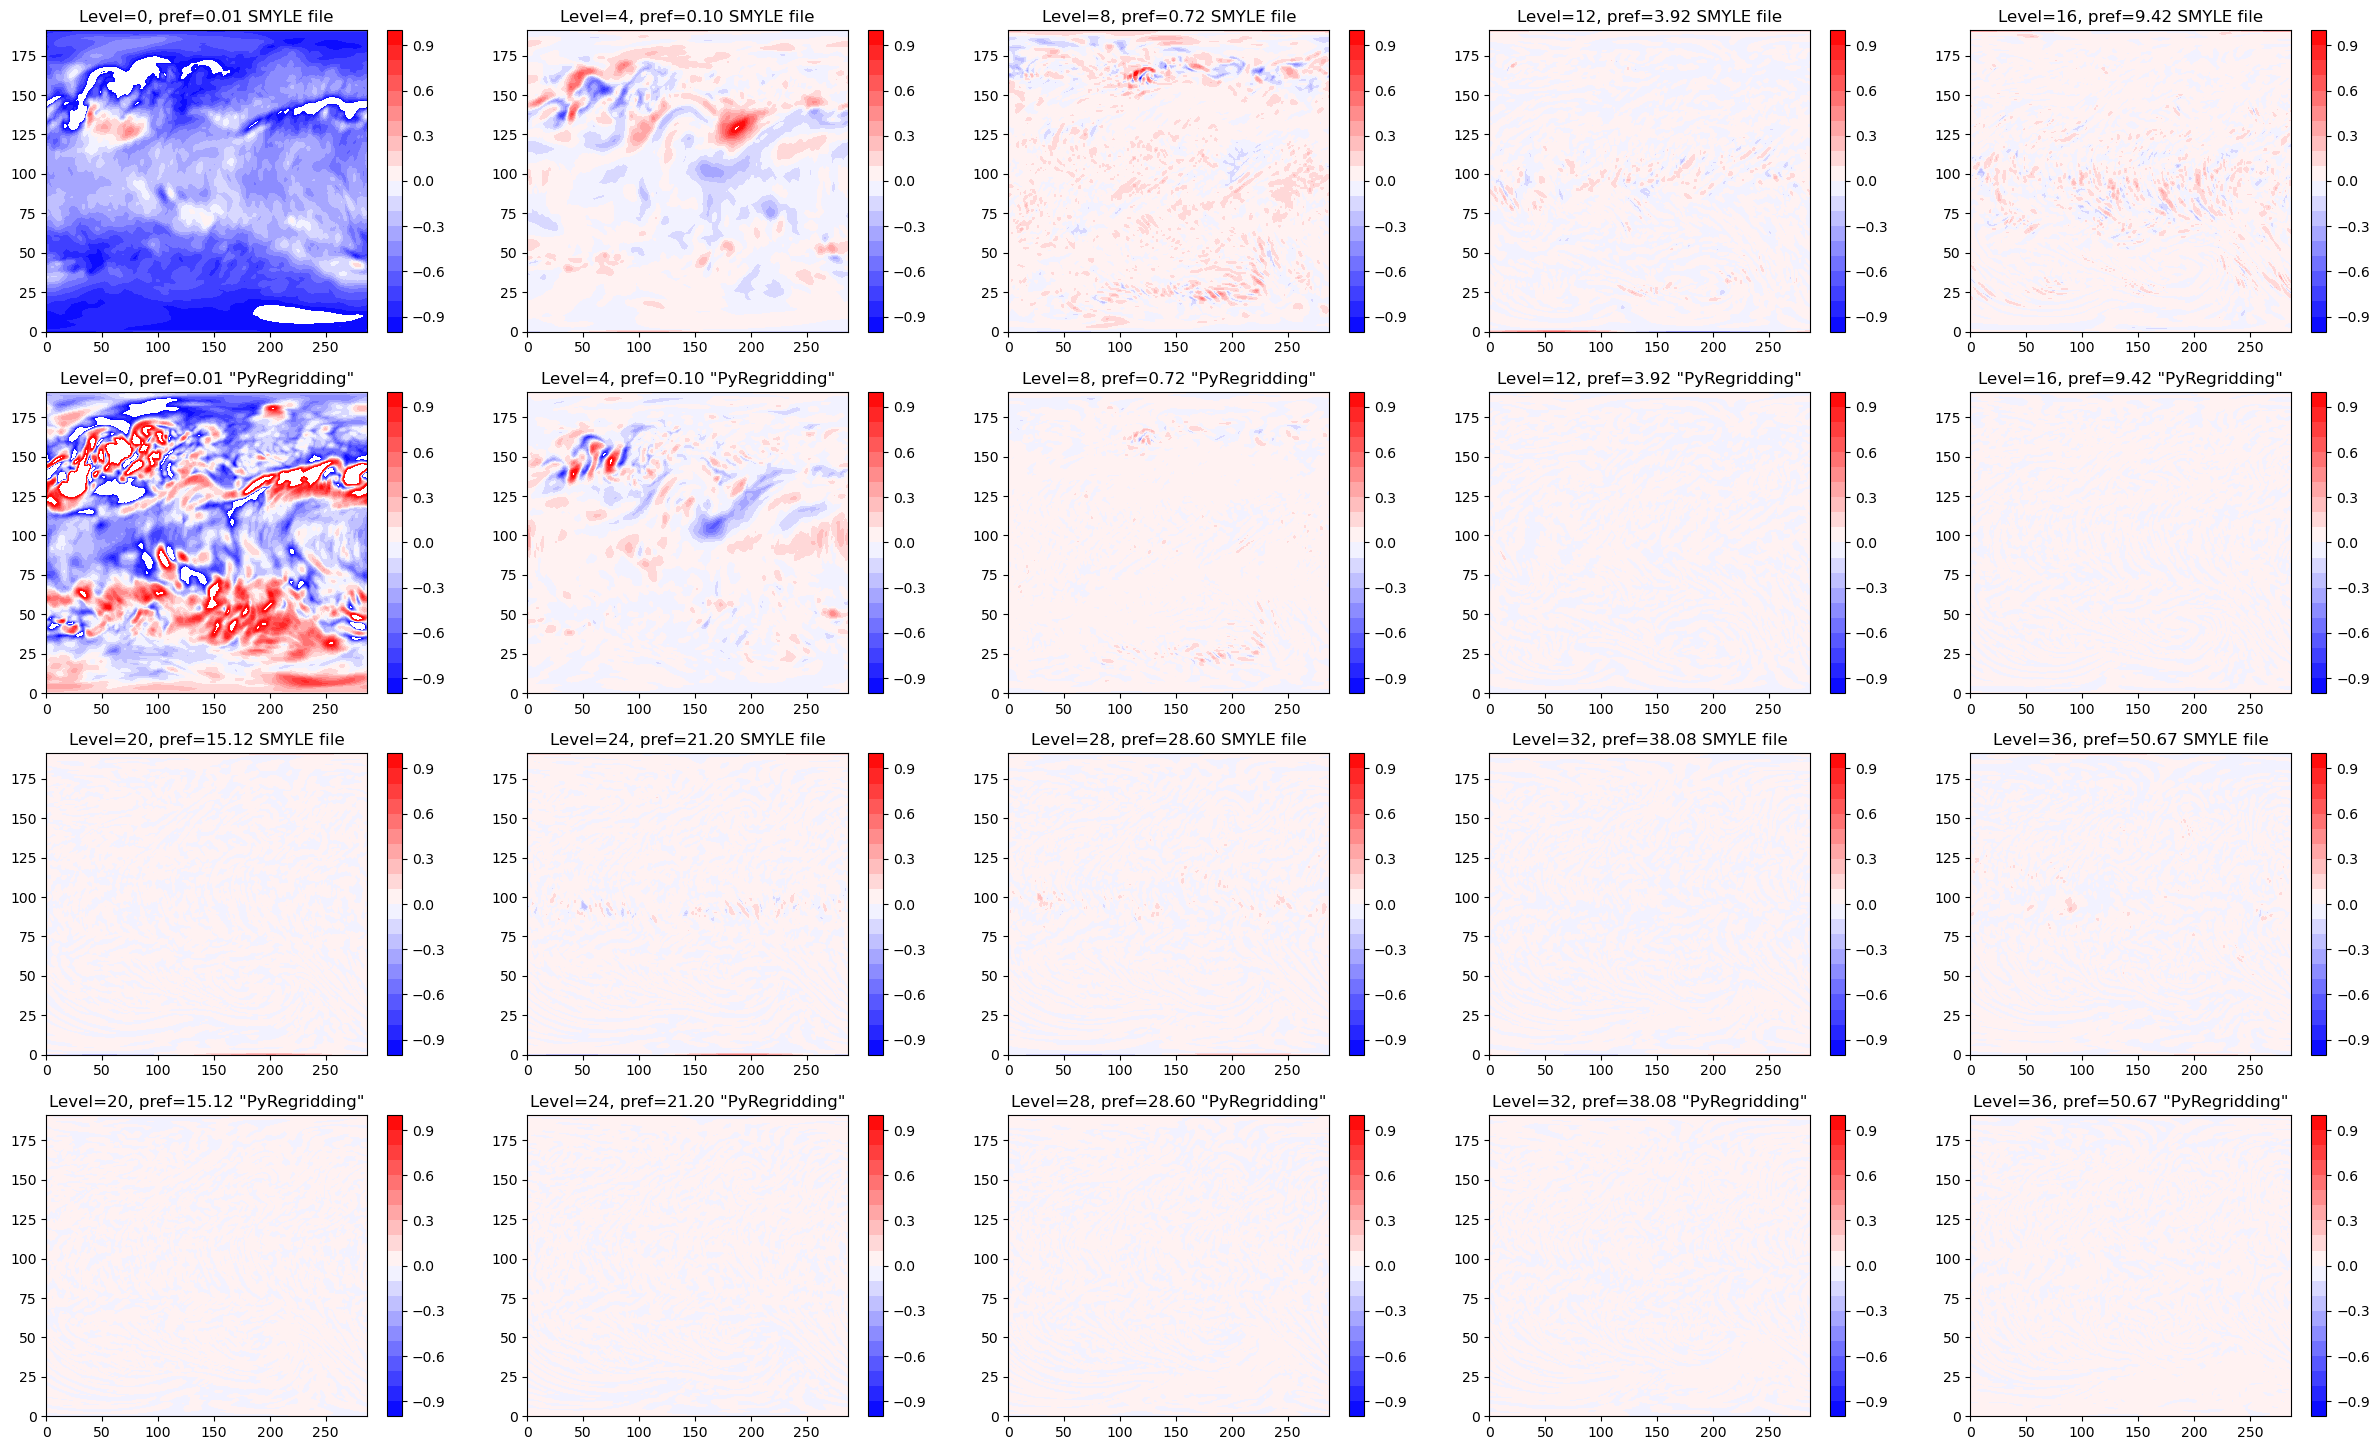

In [40]:

levs=np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(4, 5, figsize=(30, 18))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,20,30,40,50,60,70,80]
zees=np.arange(0,40,step=4)
#zees=np.arange(0,80,step=8)

i=0
for z in zees:
    co = ax[i].contourf( te0[0,z,:,:] -te_era_Lcam_prs_x1[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    cu = ax[i+5].contourf( te1[0,z,:,:] -te_era_Lcam_prs_x1[0,z,:,:] , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} SMYLE file' )
    ax[i+5].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} "PyRegridding"' )
    cb = plt.colorbar( co )
    cb2 = plt.colorbar( cu )
    if i==4:
        i=i+5+1
    else:
        i=i+1

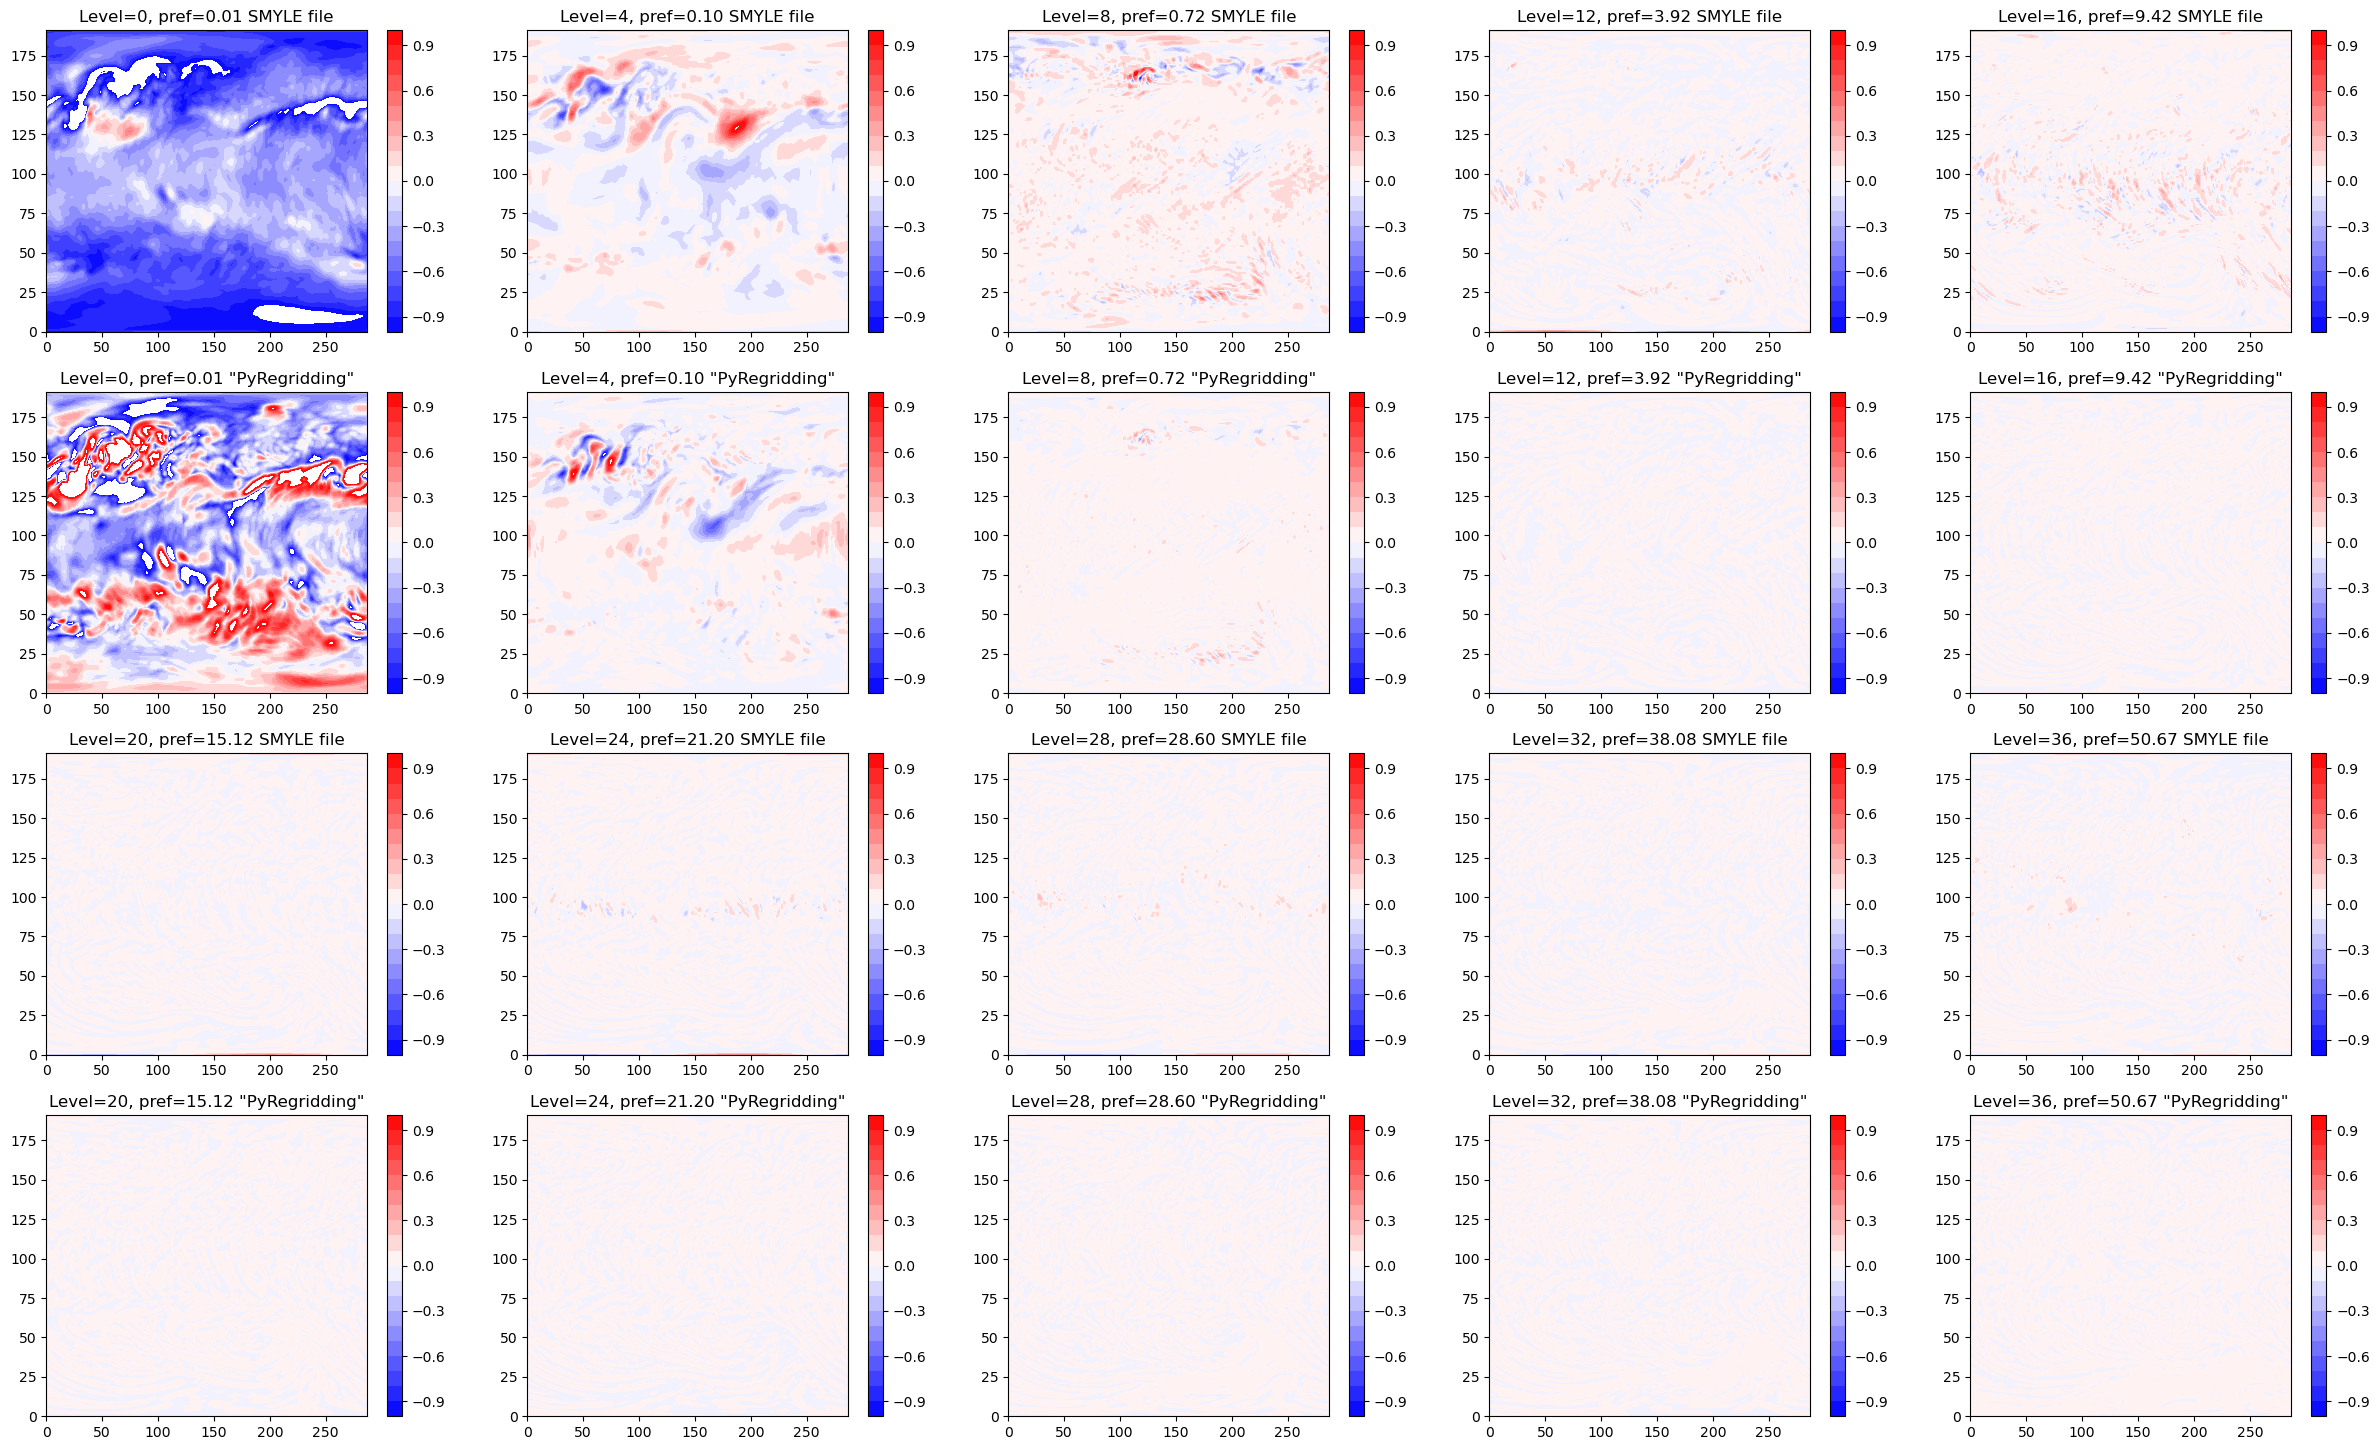

In [37]:

levs=np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(4, 5, figsize=(30, 18))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,20,30,40,50,60,70,80]
zees=np.arange(0,40,step=4)
i=0
for z in zees:
    co = ax[i].contourf( te0[0,z,:,:] -te_era_Lcam_eta_x1[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    cu = ax[i+5].contourf( te1[0,z,:,:] -te_era_Lcam_eta_x1[0,z,:,:] , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} SMYLE file' )
    ax[i+5].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} "PyRegridding"' )
    cb = plt.colorbar( co )
    cb2 = plt.colorbar( cu )
    if i==4:
        i=i+5+1
    else:
        i=i+1

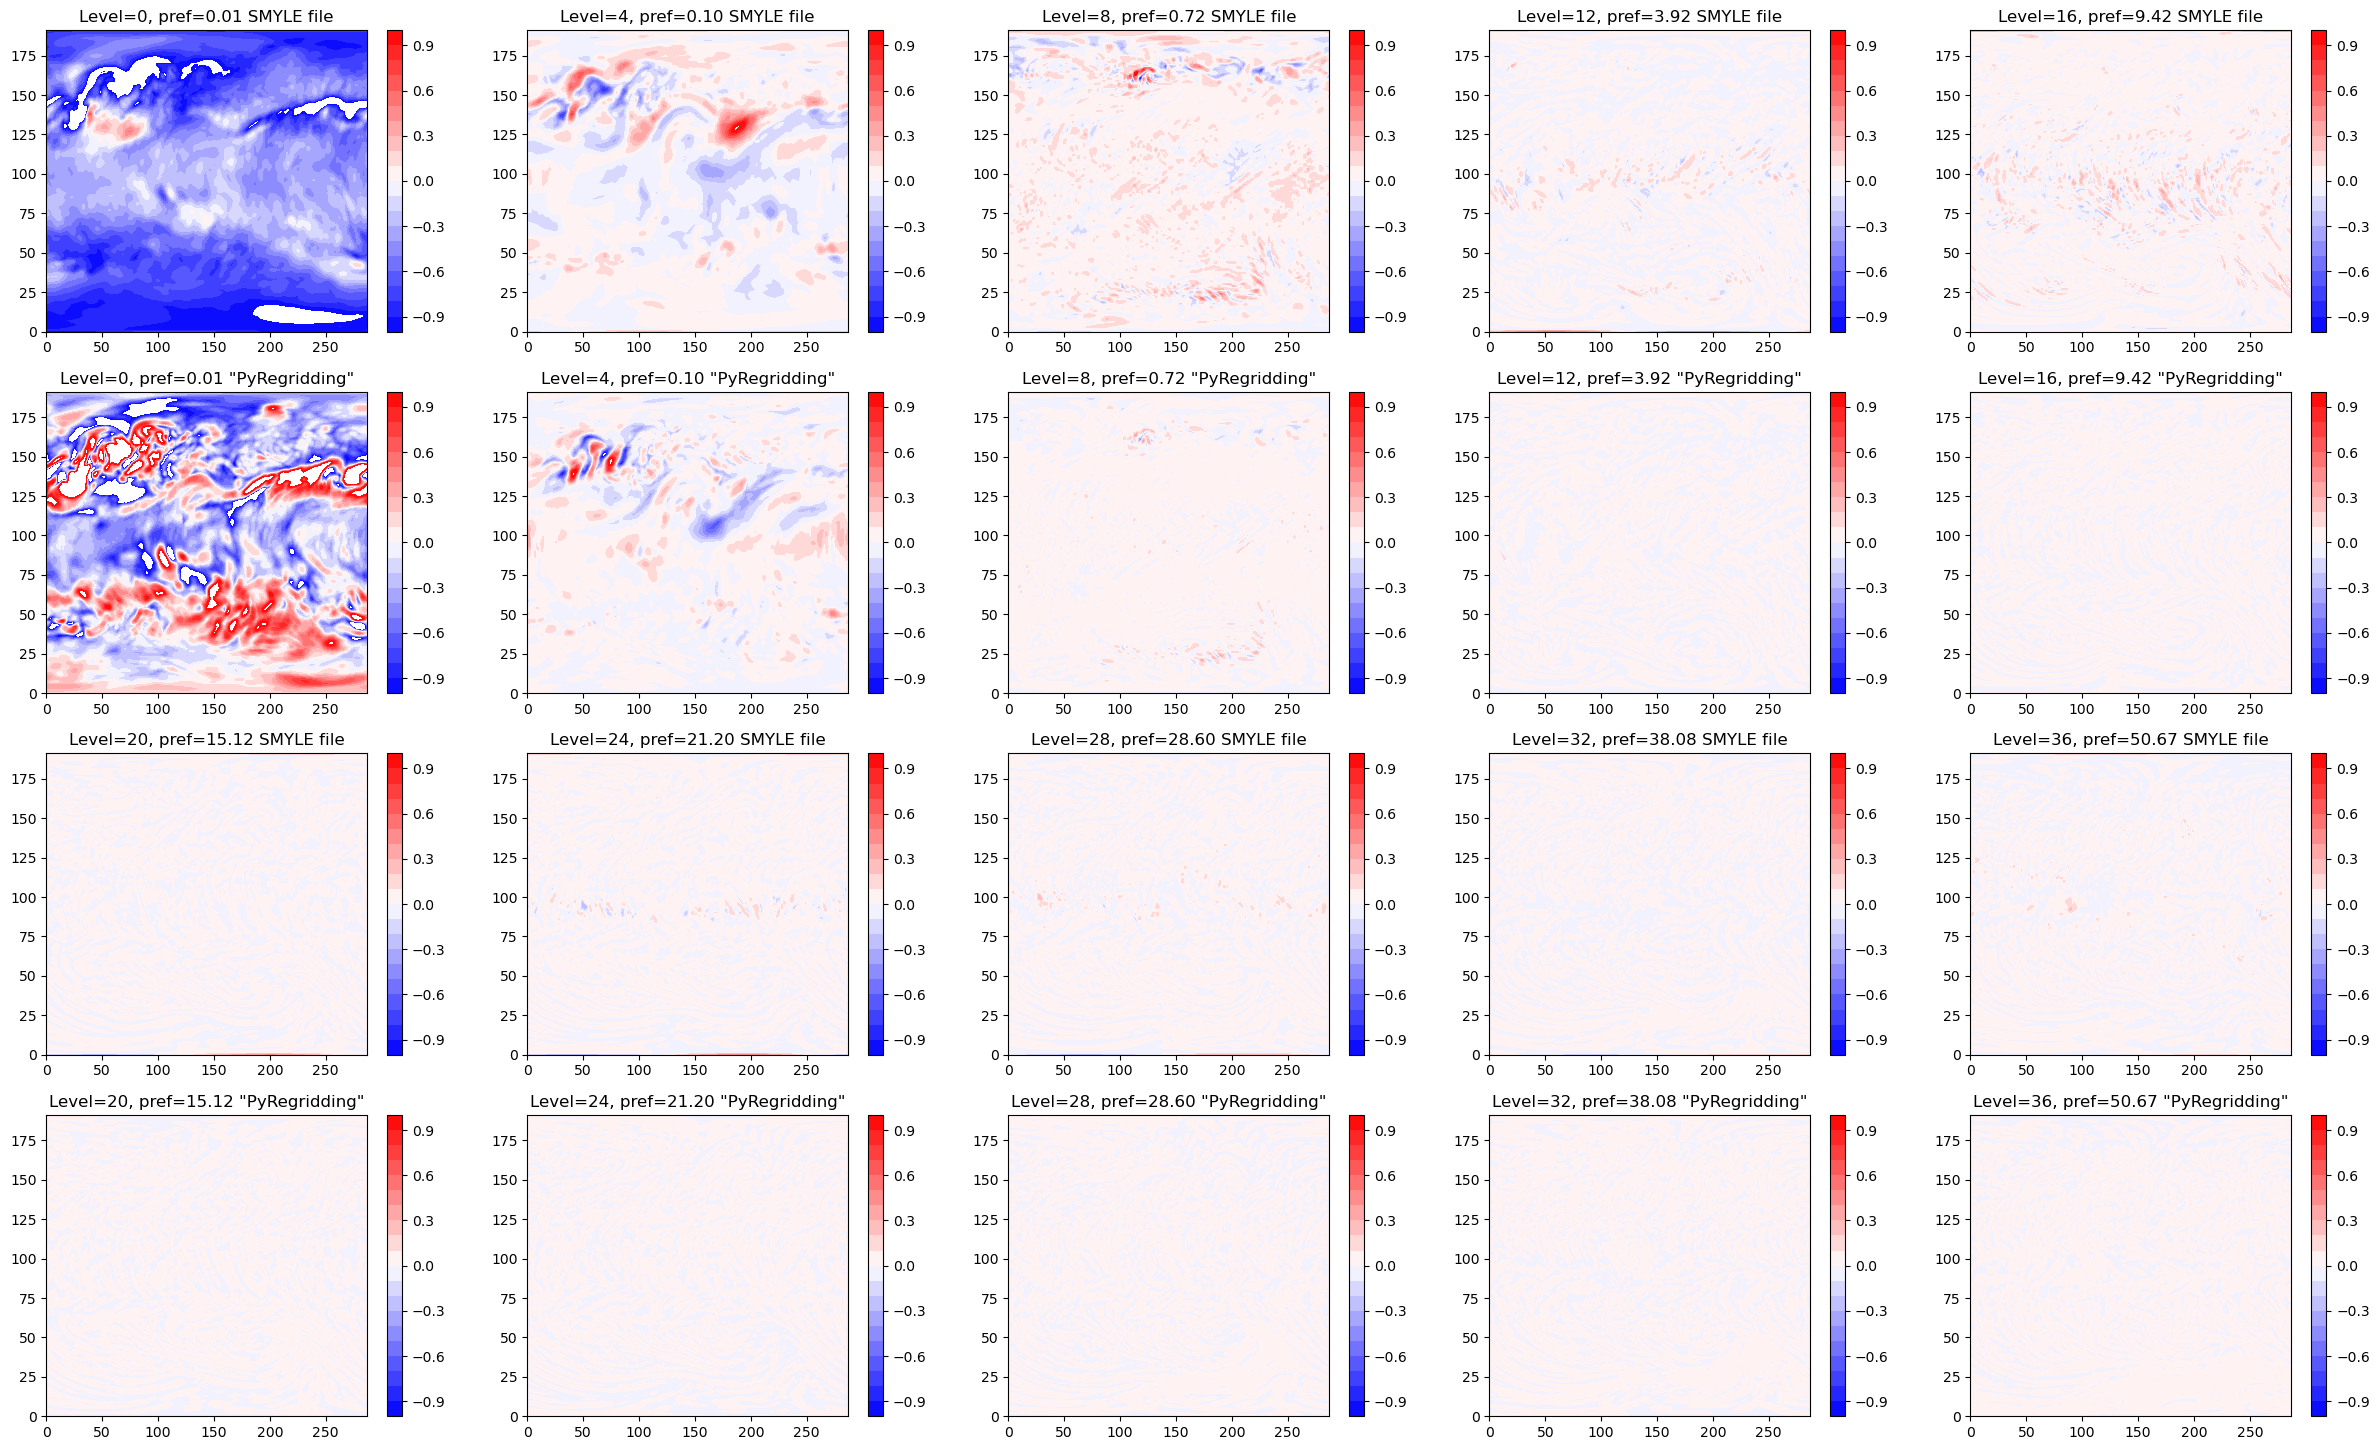

In [38]:

levs=np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(4, 5, figsize=(30, 18))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,20,30,40,50,60,70,80]
zees=np.arange(0,40,step=4)
i=0
for z in zees:
    co = ax[i].contourf( te0[0,z,:,:] -te_era_x1_Lcam_eta[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    cu = ax[i+5].contourf( te1[0,z,:,:] -te_era_x1_Lcam_eta[0,z,:,:] , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} SMYLE file' )
    ax[i+5].set_title( f'Level={str( z )}, pref={X0.lev[z].values:0.2f} "PyRegridding"' )
    cb = plt.colorbar( co )
    cb2 = plt.colorbar( cu )
    if i==4:
        i=i+5+1
    else:
        i=i+1

In [39]:
z=4
plt.contourf( te_era_x1_Lcam[0,z,:,:] - te1[0,z,:,:] )
plt.colorbar()

NameError: name 'te_era_x1_Lcam' is not defined